In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)

In [2]:
# Turnout data primarily comes from the International Institute 
#          | for Democracy and Electoral Assistance (IDEA) Voter Turnout 
#          | Database: http://www.idea.int/data-tools/data/voter-turnout     
#          | (Date accessed: May 17, 2018). 

In [3]:
# E3020 Q18. Where would you place yourself on this scale?
# E3019 Q17a-i. In politics people sometimes talk of left and right. Where
#                  would you place [PARTY A] on a scale from 0 to 10 where 0 
#                  means the left and 10 means the right?
#                  Using the same scale, where would you place [PARTY B]?
#                  Where would you place [PARTY C]?
#                  Where would you place [PARTY D]?
#                  Where would you place [PARTY E]?
#                  Where would you place [PARTY F]?
# E2020 : REGION OF RESIDENCE
# E1013 : >>> FACTOR: SAMPLE SIZE ADJUSTMENT Factor Weight of Weights provided by the national election study 

In [5]:
df = pd.read_csv("../data_external/CSES/cses5.csv")
df.head()

C:\Users\cnava\AppData\Local\Temp\ipykernel_25100\2369970355.py:1: DtypeWarning: Columns (5,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data_external/CSES/cses5.csv")


,E1001,E1002_VER,E1002_DOI,E1003,E1004,E1005,E1006,E1006_UN,E1006_UNALPHA2,E1006_UNALPHA3,E1006_NAM,E1006_REG,E1006_OECD,E1006_EU,E1006_VDEM,E1007,E1008,E1009,E1009_P1,E1009_P2,E1010_1,E1010_2,E1010_3,E1011_1,E1011_2,E1011_3,E1012_1,E1012_2,E1012_3,E1013,E1014_1,E1014_2,E1014_3,E1015,E1016,E1017,E1018,E1018_1,E1018_2,E1019,E1020,E1021,E1021_1,E1021_2,E1022,E1023,E1024_1,E1024_2,E1024_3,E1025_1,E1025_2,E1025_3,E1026,E1027,E1028,E1029,E1030,E1031,E1032,E1033,E1034,E1035_1,E1035_2,E1036,E1037,E1038,E1039,E2001_Y,E2001_A,E2001_GG,E2001_GS,E2001_GBB,E2001_GX,E2001_GY,E2001_GZ,E2002,E2003,E2004,E2005,E2006,E2007,E2008,E2009,E2010,E2011,E2012,E2013,E2014,E2015,E2016,E2017,E2018,E2019,E2020,E2021,E2022,E3001,E3002,E3003,E3004_1,E3004_1_PT,E3004_2,E3004_3,E3004_4,E3004_5,E3004_6,E3004_7,E3004_8_PT,E3005_1,E3005_2,E3005_3,E3005_4,E3005_5,E3006_1,E3006_2,E3006_3,E3006_4,E3006_5_PT,E3006_6_PT,E3006_7_PT,E3006_8_PT,E3007,E3008,E3008_PT,E3009,E3010_1,E3010_2,E3011,E3012,E3012_PR_1,E3012_PR_2,E3012_LH,E3012_UH,E3012_TS,E3012_FTV,E3013_PR_1,E3013_PR_2,E3013_LH_PL,E3013_LH_DC,E3013_LH_PF,E3013_UH_PL,E3013_UH_DC_1,E3013_UH_DC_2,E3013_UH_PF,E3013_OUTGOV,E3013_VS_1,E3013_LR_CSES,E3013_LR_MARPOR,E3013_IF_CSES,E3014_PR_1,E3014_PR_2,E3014_LH,E3014_UH,E3015_PR_1,E3015_PR_2,E3015_LH_PL,E3015_LH_DC,E3015_UH_PL,E3015_UH_DC_1,E3015_UH_DC_2,E3016_1,E3016_2,E3017_A,E3017_B,E3017_C,E3017_D,E3017_E,E3017_F,E3017_G,E3017_H,E3017_I,E3018_A,E3018_B,E3018_C,E3018_D,E3018_E,E3018_F,E3018_G,E3018_H,E3018_I,E3019_A,E3019_B,E3019_C,E3019_D,E3019_E,E3019_F,E3019_G,E3019_H,E3019_I,E3020,E3021_A,E3021_B,E3021_C,E3021_D,E3021_E,E3021_F,E3021_G,E3021_H,E3021_I,E3022,E3023,E3024_1,E3024_2,E3024_3,E3024_4,E3100_LR_CSES,E3100_LR_MARPOR,E3100_POP_CSES,E3100_IF_CSES,E4001,E4001_N,E4002,E4002_N,E4003,E4003_N,E4004_A,E4004_B,E4004_C,E4004_D,E4004_E,E4004_F,E4004_G,E4004_H,E4004_I,E4004_A_N,E4004_B_N,E4004_C_N,E4004_D_N,E4004_E_N,E4004_F_N,E4004_G_N,E4004_H_N,E4004_I_N,E4005_A,E4005_B,E4005_C,E4005_D,E4005_E,E4005_F,E4005_G,E4005_H,E4005_I,E4005_A_N,E4005_B_N,E4005_C_N,E4005_D_N,E4005_E_N,E4005_F_N,E4005_G_N,E4005_H_N,E4005_I_N,E4006,E4006_N,E4007,E4007_N,E5000_A,E5000_B,E5000_C,E5000_D,E5000_E,E5000_F,E5000_G,E5000_H,E5000_I,E5000_L_A,E5000_L_B,E5000_L_C,E5000_L_D,E5000_L_E,E5000_L_F,E5000_L_G,E5000_L_H,E5000_L_I,E5001_A,E5001_B,E5001_C,E5001_D,E5001_E,E5001_F,E5001_G,E5001_H,E5001_I,E5002_A,E5002_B,E5002_C,E5002_D,E5002_E,E5002_F,E5002_G,E5002_H,E5002_I,E5003_A,E5003_B,E5003_C,E5003_D,E5003_E,E5003_F,E5003_G,E5003_H,E5003_I,E5004_A,E5004_B,E5004_C,E5004_D,E5004_E,E5004_F,E5004_G,E5004_H,E5004_I,E5005_A,E5005_B,E5005_C,E5005_D,E5005_E,E5005_F,E5005_G,E5005_H,E5005_I,E5006_1,E5006_2,E5007_1,E5007_2,E5008_1,E5008_2,E5008_3,E5009,E5010,E5011_A,E5011_B,E5011_C,E5011_D,E5011_E,E5011_F,E5011_G,E5011_H,E5011_I,E5012,E5013,E5014,E5015_A,E5015_B,E5015_C,E5015_D,E5015_E,E5015_F,E5015_G,E5015_H,E5015_I,E5016,E5017_A,E5017_B,E5017_C,E5017_D,E5017_E,E5017_F,E5017_G,E5017_H,E5017_I,E5018_A,E5018_B,E5018_C,E5018_D,E5018_E,E5018_F,E5018_G,E5018_H,E5018_I,E5019,E5019_A,E5019_B,E5019_C,E5019_D,E5019_E,E5019_F,E5019_G,E5019_H,E5019_I,E5020,E5020_A,E5020_B,E5020_C,E5020_D,E5020_E,E5020_F,E5020_G,E5020_H,E5020_I,E5021_1,E5021_2,E5021_3,E5021_4,E5021_5,E5022,E5023,E5024,E5025_1,E5025_2,E5025_3,E5026_1,E5026_2,E5026_3,E5026_W,E5026_S,E5027,E5028,E5029,E5030,E5031,E5032,E5033,E5034,E5035,E5036,E5037,E5038,E5039,E5040_1,E5040_2,E5040_3,E5040_4,E5041_1,E5041_2,E5041_3,E5041_4,E5042_1,E5042_2,E5042_3,E5042_4,E5043_1,E5043_2,E5043_3,E5043_4,E5044_1,E5044_2,E5044_3,E5044_4,E5045_1,E5045_2,E5045_3,E5045_4,E5046_1,E5046_2,E5046_3,E5046_4,E5047_1,E5047_2,E5047_3,E5047_4,E5048_1,E5048_2,E5048_3,E5048_4,E5049_1,E5049_2,E5049_3,E5049_4,E5050,E5051,E5052,E5053,E5054,E5055,E5056,E5057,E5058,E5059,E5060,E5061,E5062,E5063,E5064,E5065,E5066,E5067,E5068,E5069,E5070,E5071,E5072,E5073,E5074,E5075,E5076_1,E5076_2,E5077,E5078,E5079,E5080,E5081,E5082_1,E5082_2,E5082_3,E5082_4,E5083_1,E5083_2,E5083_3,E5083_4,E5083_5,E5084_1

In [6]:
df["E1004"].unique()

array(['ALB_2017', 'AUS_2019', 'AUT_2017', 'BELF2019', 'BELW2019',
       'BRA_2018', 'CAN_2019', 'CHE_2019', 'CHL_2017', 'CRI_2018',
       'CZE_2017', 'CZE_2021', 'DEU_2017', 'DEU_2021', 'DNK_2019',
       'FIN_2019', 'FRA_2017', 'GBR_2017', 'GBR_2019', 'GRC_2015',
       'GRC_2019', 'HKG_2016', 'HUN_2018', 'IND_2019', 'IRL_2016',
       'ISL_2016', 'ISL_2017', 'ISR_2020', 'ITA_2018', 'JPN_2017',
       'KOR_2016', 'LTU_2016', 'LTU_2020', 'LVA_2018', 'MEX_2018',
       'MNE_2016', 'NLD_2017', 'NLD_2021', 'NOR_2017', 'NZL_2017',
       'NZL_2020', 'PER_2021', 'POL_2019', 'PRT_2019', 'ROU_2016',
       'SLV_2019', 'SVK_2020', 'SWE_2018', 'THA_2019', 'TUN_2019',
       'TUR_2018', 'TWN_2016', 'TWN_2020', 'URY_2019', 'USA_2016',
       'USA_2020'], dtype=object)

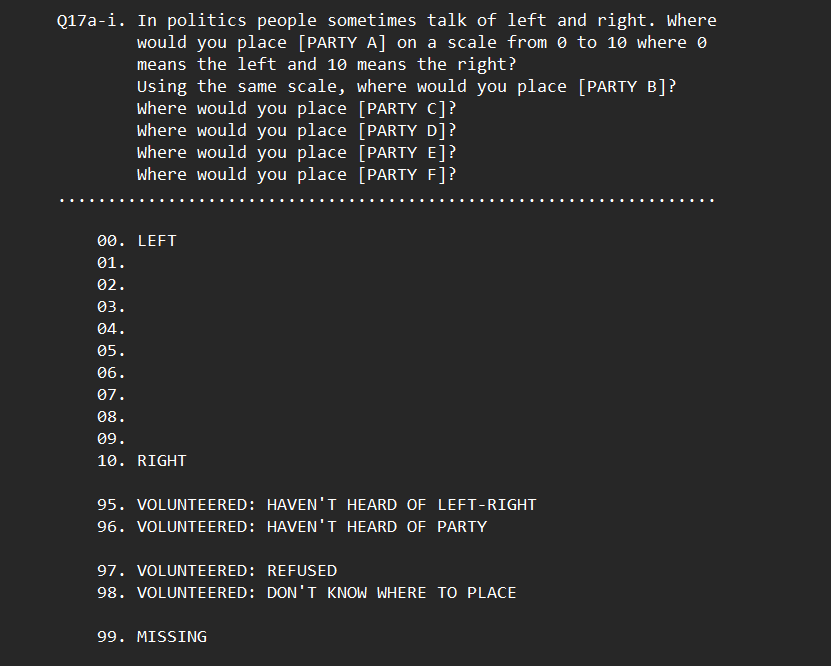

In [7]:
df["E1004"].unique()

array(['ALB_2017', 'AUS_2019', 'AUT_2017', 'BELF2019', 'BELW2019',
       'BRA_2018', 'CAN_2019', 'CHE_2019', 'CHL_2017', 'CRI_2018',
       'CZE_2017', 'CZE_2021', 'DEU_2017', 'DEU_2021', 'DNK_2019',
       'FIN_2019', 'FRA_2017', 'GBR_2017', 'GBR_2019', 'GRC_2015',
       'GRC_2019', 'HKG_2016', 'HUN_2018', 'IND_2019', 'IRL_2016',
       'ISL_2016', 'ISL_2017', 'ISR_2020', 'ITA_2018', 'JPN_2017',
       'KOR_2016', 'LTU_2016', 'LTU_2020', 'LVA_2018', 'MEX_2018',
       'MNE_2016', 'NLD_2017', 'NLD_2021', 'NOR_2017', 'NZL_2017',
       'NZL_2020', 'PER_2021', 'POL_2019', 'PRT_2019', 'ROU_2016',
       'SLV_2019', 'SVK_2020', 'SWE_2018', 'THA_2019', 'TUN_2019',
       'TUR_2018', 'TWN_2016', 'TWN_2020', 'URY_2019', 'USA_2016',
       'USA_2020'], dtype=object)

In [8]:
parties = "ABCDEFGHI"
output = []
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    return (val * wt).sum() / wt.sum()

pkey = "CHL_2017"

data = df.query(f"E1004 == '{pkey}'")

for region_id, frag_region in data.groupby("E2020"):
    for party in list(parties):
        column = f"E3019_{party}"
        frag = frag_region.query(f"{column} <= 10") #[f"E3019_{party}"]
        v = weighted_average(frag, column, "E1013")
        share = data[f"E5001_{party}"].unique()[0]  / 100

        output.append({
            "value": v,
            "party": party,
            "region_id": region_id,
            "share": float(share) if share <= 1 else np.nan,
            "n": frag_region.shape[0]
        })

df_party = pd.DataFrame(output)
df_party.head()

,value,party,region_id,share,n
0,8.64,A,1,0.1781,33
1,8.92,B,1,0.1598,33
2,4.56,C,1,0.1028,33
3,1.80,D,1,0.0976,33
4,2.68,E,1,0.0610,33


In [10]:
ideology = []

for region_id, frag_region in df_party.dropna().groupby("region_id"):

    for i, frag_a in frag_region.groupby("party"):
        v = 0
        for j, frag_b in frag_region.groupby("party"):
            if i != j:
                distance = np.absolute(frag_a["value"].values[0] - frag_b["value"].values[0])
                share = frag_b["share"].values[0] / (1 - frag_a["share"].values[0])
                v += (distance * share)

        ideology.append({
            "party": i,
            "region_id": region_id,
            "value": v * frag_a["share"].values[0],
            "n": frag_a["n"].values[0]
        })

pd.DataFrame(ideology).groupby("region_id").agg({"value": "sum", "n": "max"}).reset_index()#.to_csv(f"data_cses/{pkey}.csv", index=False)

,region_id,value,n
0,1,2.430029,33
1,2,2.167647,65
2,3,1.869422,25
3,4,1.513673,102
4,5,1.908459,260
5,6,2.052704,97
6,7,2.006599,66
7,8,1.092131,246
8,9,1.768222,86
9,10,1.676759,86
